In [1]:
# import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import scienceplots

plt.style.use(['science', 'grid', 'nature', 'notebook'])

In [2]:
path2data = '../results/results_1.csv'
path2data_eigen = '../results/results_eigen_sigmaz.csv'
path2data_2 = '../results/results_2.csv'
path2data_3 = '../results/results_x_state.csv'
path2data_2q_sz1 = '../results/results_2q_sigmaz_1.csv'

def load_data(path2data):
    with open(path2data, 'r') as f:
        data = f.read()

        # cargo time step
        index_time_step = data.find('time step:')
        index_time_step_end = data.find('\n', index_time_step)
        h = float(data[index_time_step+len('time step:'):index_time_step_end])

        # cargo time_limits:
        index_time_limits = data.find('time limits:')
        index_time_limits_end = data.find('\n', index_time_limits)
        time_limits = data[index_time_limits+len('time limits:'):index_time_limits_end].split(',')
        time_limits = [float(i) for i in time_limits]

        # Cargo estados
        index_start_shape = data.find('shape:')
        index_end_shape = data.find('\n', index_start_shape)
        shape = data[index_start_shape+len('shape:'):index_end_shape].split(',')
        shape = [int(i) for i in shape]

        index_start_n_states = data.find('n_states:')
        index_end_n_states = data.find('\n', index_start_n_states)
        n_states = int(data[index_start_n_states+len('n_states:'):index_end_n_states])

        states = data[index_end_n_states+2:].strip().split('),(')   # separo los estados
        states[-1] = states[-1][:-1]    # saco el ultimo parentesis

        # los paso a numeros complejos de numpy
        res = np.empty(n_states*shape[0]*shape[1], dtype=complex)
        for i, state in enumerate(states):
            state_splited = state.split(',')
            res[i] = complex(float(state_splited[0]), float(state_splited[1]))

        res = res.reshape(n_states, shape[0], shape[1])

        return res, h, time_limits


states, h, time_limits = load_data(path2data)
states_2, h_2, time_limits_2 = load_data(path2data_2)
states_x, h_x, time_limits_x = load_data(path2data_3)
states_2q_sz1, h_2q_sz1, time_limits_2q_sz1 = load_data(path2data_2q_sz1)
states_eigen, h_eigen, time_limits_eigen = load_data(path2data_eigen)

gamma_minus = 0.1
gamma_plus = 0.1
gamma_phi = 0.1

/opt/homebrew/Caskroom/miniforge/base/envs/repo/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniforge/base/envs/repo/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


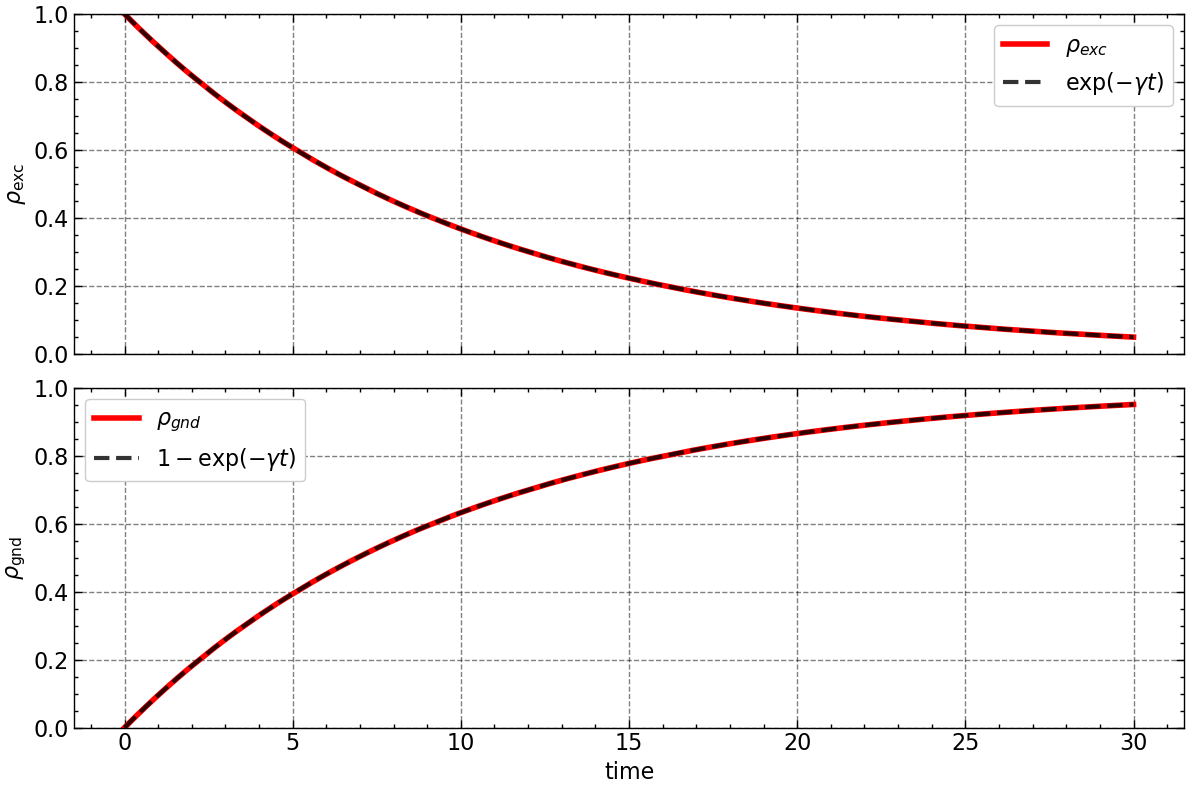

In [3]:
time_axis = np.arange(time_limits[0], time_limits[1]+h, h)


up_decay = lambda t, pee: pee * np.exp(-gamma_minus * t)    # Solución analítica para el elemento 0,0 de la matriz de densidad (proba de que este en excitado)
down_decay = lambda t, pee: 1 - up_decay(t, pee)            # Solución analítica para el elemento 1,1 de la matriz de densidad (proba de que este en el estado base)

p_exc_r = states[:,0,0]
p_gnd_r = states[:,1,1]
p_01_r = states[:, 0,1]
p_10_r = states[:, 1,0]


fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(time_axis, p_exc_r, label=r'$\rho_{exc}$', color='red', lw=4)
ax[0].plot(time_axis, up_decay(time_axis, p_exc_r[0]), label=r'$\exp(-\gamma t)$', linestyle='--', color='black', alpha=0.8, lw=3)
ax[1].plot(time_axis, p_gnd_r, label=r'$\rho_{gnd}$', color='red', lw=4)
ax[1].plot(time_axis, down_decay(time_axis, p_exc_r[0]), label=r'$1 - \exp(-\gamma t)$', linestyle='--', color='black', alpha=0.8, lw=3)
ax[1].set_xlabel('time')

ax[0].set_ylabel(r'$\rho_\text{exc}$')
ax[1].set_ylabel(r'$\rho_\text{gnd}$')
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)

ax[0].legend()
ax[1].legend()

plt.tight_layout()

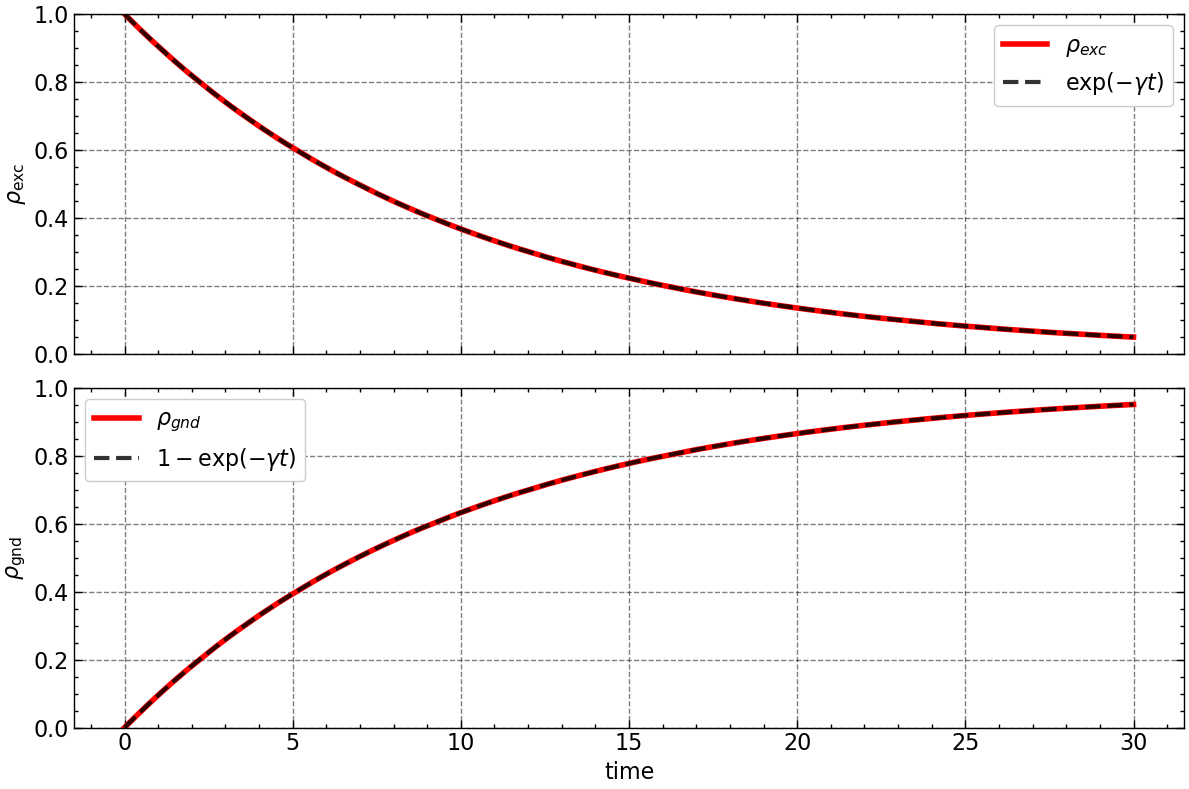

In [4]:
time_axis_eigen = np.arange(time_limits_eigen[0], time_limits_eigen[1]+h_eigen, h_eigen)


up_decay = lambda t, pee: pee * np.exp(-gamma_minus * t)    # Solución analítica para el elemento 0,0 de la matriz de densidad (proba de que este en excitado)
down_decay = lambda t, pee: 1 - up_decay(t, pee)            # Solución analítica para el elemento 1,1 de la matriz de densidad (proba de que este en el estado base)

p_exc_r = states_eigen[:,0,0]
p_gnd_r = states_eigen[:,1,1]
p_01_r = states_eigen[:, 0,1]
p_10_r = states_eigen[:, 1,0]


fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(time_axis_eigen, p_exc_r, label=r'$\rho_{exc}$', color='red', lw=4)
ax[0].plot(time_axis_eigen, up_decay(time_axis_eigen, p_exc_r[0]), label=r'$\exp(-\gamma t)$', linestyle='--', color='black', alpha=0.8, lw=3)
ax[1].plot(time_axis_eigen, p_gnd_r, label=r'$\rho_{gnd}$', color='red', lw=4)
ax[1].plot(time_axis_eigen, down_decay(time_axis_eigen, p_exc_r[0]), label=r'$1 - \exp(-\gamma t)$', linestyle='--', color='black', alpha=0.8, lw=3)
ax[1].set_xlabel('time')

ax[0].set_ylabel(r'$\rho_\text{exc}$')
ax[1].set_ylabel(r'$\rho_\text{gnd}$')
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)

ax[0].legend()
ax[1].legend()

plt.tight_layout()

In [5]:
qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

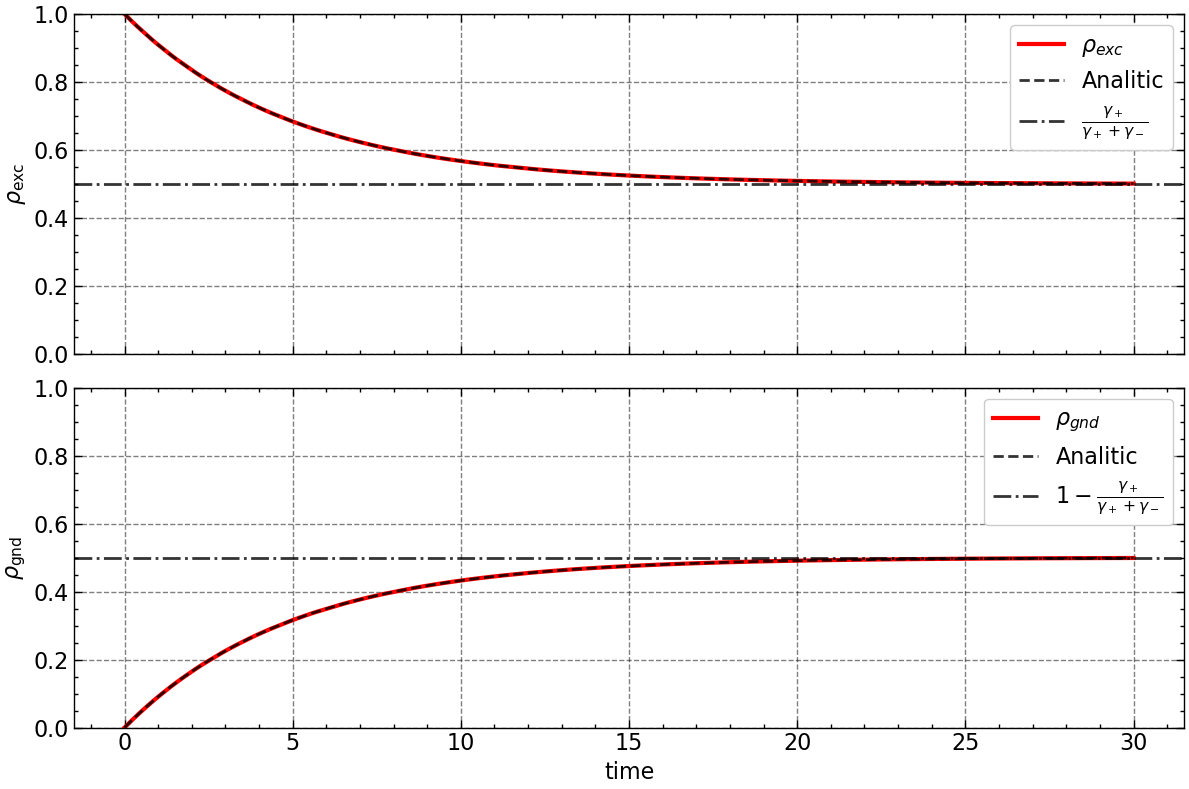

In [6]:
time_axis = np.arange(time_limits_2[0], time_limits_2[1]+h_2, h_2)

up_decay_re = lambda t, pee_0: gamma_plus/(gamma_plus+gamma_minus) + (pee_0 - gamma_plus/(gamma_plus+gamma_minus)) * np.exp(-(gamma_plus+gamma_minus) * t)
down_decay_re = lambda t, pee_0: 1 - up_decay_re(t, pee_0)

p_exc_re = states_2[:,0,0]
p_gnd_re = states_2[:,1,1]
p_01_re = states_2[:, 0,1]
p_10_re = states_2[:, 1,0]


fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(time_axis, p_exc_re, label=r'$\rho_{exc}$', color='red', lw=3)
ax[0].plot(time_axis, up_decay_re(time_axis, p_exc_re[0]), label='Analitic', linestyle='--', color='black', alpha=0.8)
ax[0].axhline(gamma_plus/(gamma_plus+gamma_minus), label=r'$\frac{\gamma_+}{\gamma_+ + \gamma_-}$', linestyle='-.', color='black', alpha=0.8)
ax[1].plot(time_axis, p_gnd_re, label=r'$\rho_{gnd}$', color='red', lw=3)
ax[1].plot(time_axis, down_decay_re(time_axis, p_exc_re[0]), label='Analitic', linestyle='--', color='black', alpha=0.8)
ax[1].axhline(1 - gamma_plus/(gamma_plus+gamma_minus), label=r'$1 - \frac{\gamma_+}{\gamma_+ + \gamma_-}$', linestyle='-.', color='black', alpha=0.8)
ax[1].set_xlabel('time')

ax[0].set_ylabel(r'$\rho_\text{exc}$')
ax[1].set_ylabel(r'$\rho_\text{gnd}$')
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)

ax[0].legend()
ax[1].legend()

plt.tight_layout()

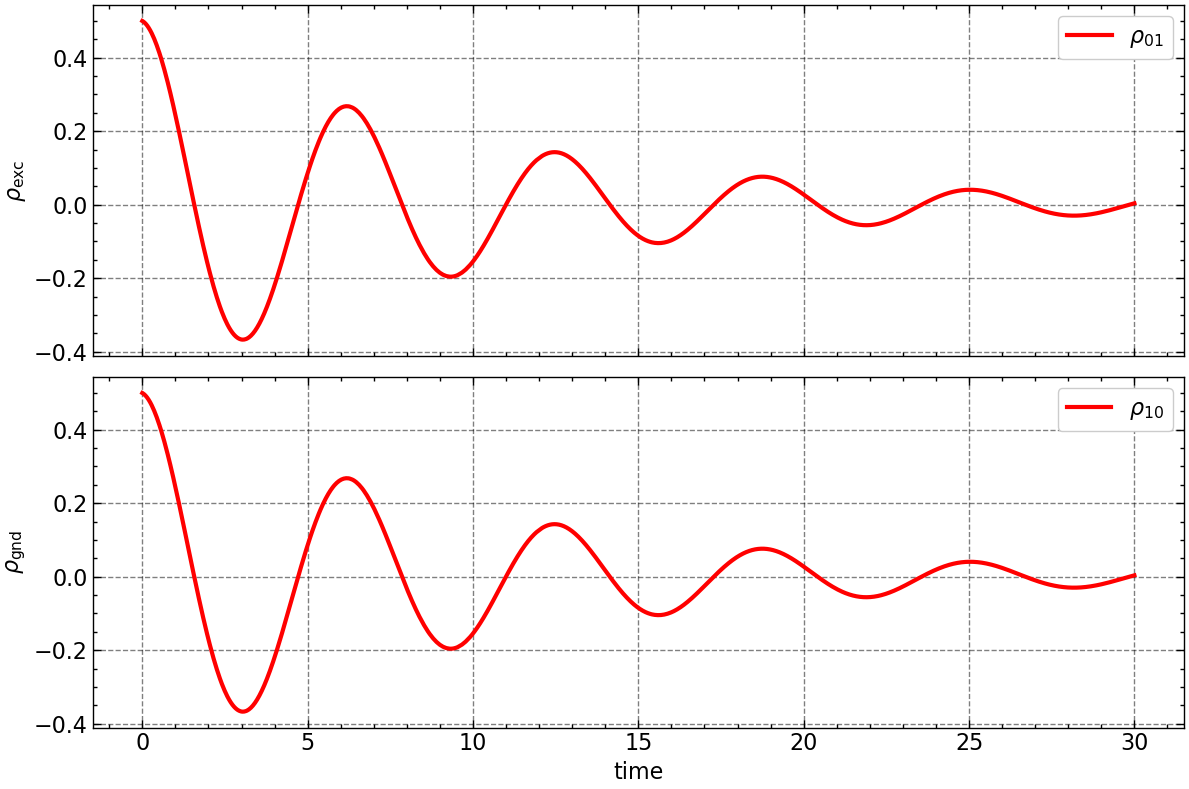

In [7]:

p_exc_x = states_x[:,0,0]
p_gnd_x = states_x[:,1,1]
p_01_x = states_x[:, 0,1]
p_10_x = states_x[:, 1,0]


fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(time_axis, p_01_x, label=r'$\rho_{01}$', color='red', lw=3)
ax[1].plot(time_axis, p_10_x, label=r'$\rho_{10}$', color='red', lw=3)
ax[1].set_xlabel('time')

ax[0].set_ylabel(r'$\rho_\text{exc}$')
ax[1].set_ylabel(r'$\rho_\text{gnd}$')
# ax[0].set_ylim(0, 1)
# ax[1].set_ylim(0, 1)

ax[0].legend()
ax[1].legend()

plt.tight_layout()

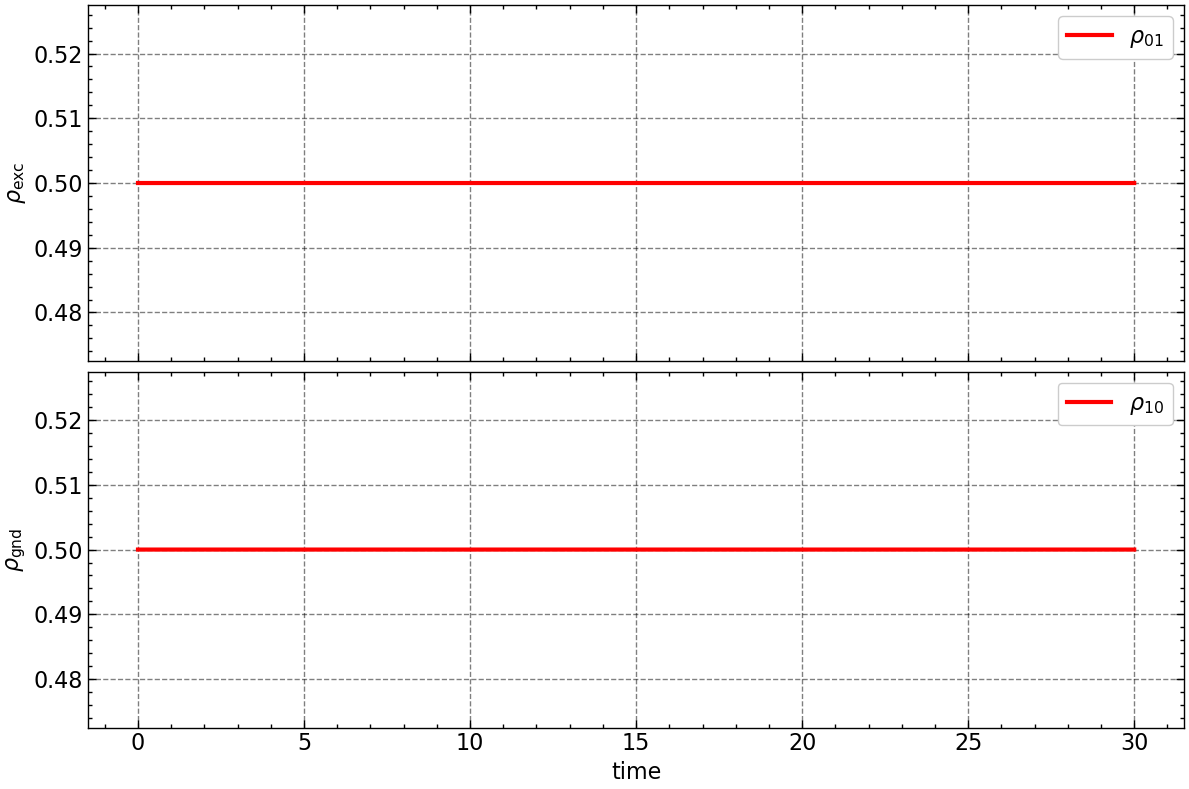

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(time_axis, p_gnd_x, label=r'$\rho_{01}$', color='red', lw=3)
ax[1].plot(time_axis, p_exc_x, label=r'$\rho_{10}$', color='red', lw=3)
ax[1].set_xlabel('time')

ax[0].set_ylabel(r'$\rho_\text{exc}$')
ax[1].set_ylabel(r'$\rho_\text{gnd}$')
# ax[0].set_ylim(0, 1)
# ax[1].set_ylim(0, 1)

ax[0].legend()
ax[1].legend()

plt.tight_layout()

In [9]:
wq_1, wq_2 = 1.0, 1.0
lambda_minnus = 0.1

H = wq_1 / 2 * qt.tensor(qt.sigmaz(), qt.qeye(2)) + wq_2 / 2 * qt.tensor(qt.qeye(2), qt.sigmaz())

psi_0 = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

# C_minuus_1 = np.sqrt(lambda_minnus) * qt.tensor(qt.sigmam(), qt.qeye(2)) 
C_minuus_2 = np.sqrt(lambda_minnus) * qt.tensor(qt.sigmam(), qt.qeye(2))

In [10]:
time_limits = [0, 30]
time_step = 0.001

time_axis = np.arange(time_limits[0], time_limits[1]+time_step, time_step)

result = qt.mesolve(H, psi_0, time_axis, [C_minuus_2])

states = np.array(result.states)

In [11]:
states[10]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.9990005 0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.0009995 0.       ]
 [0.        0.        0.        0.       ]]

In [12]:
qt.Qobj(states_2q_sz1[10])

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99100e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 8.99595e-04 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]

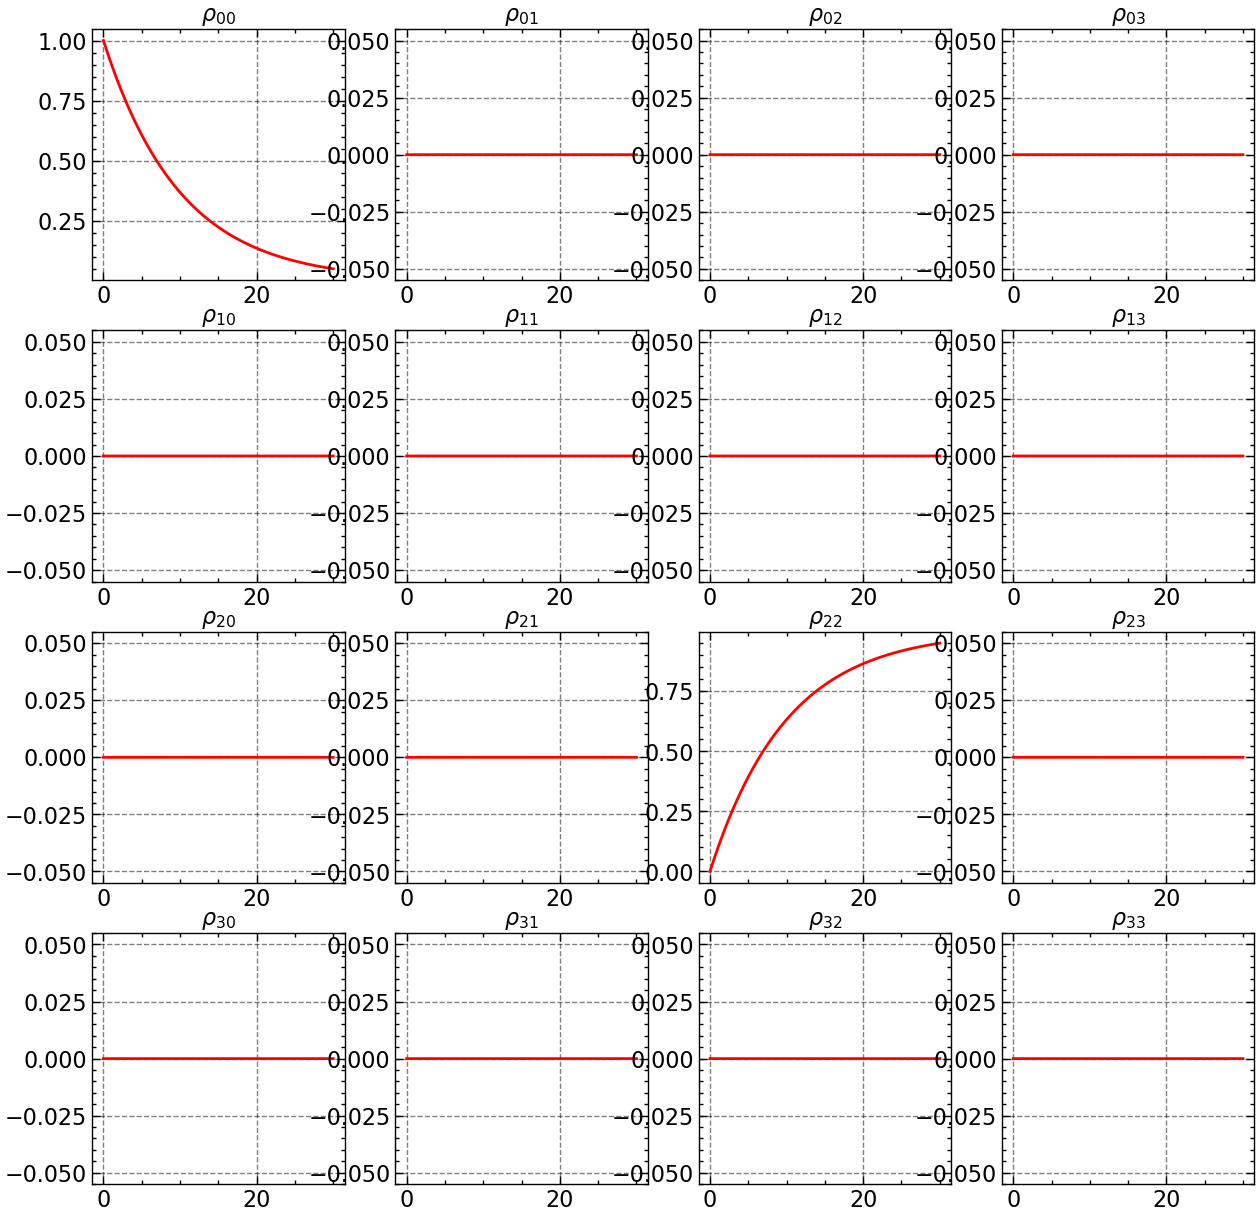

In [13]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        y_data = np.array([state[i, j] for state in states])
        ax[i, j].plot(time_axis, y_data, label=f'$\\rho_{{{i}{j}}}$', color='red')
        ax[i, j].set_title(f'$\\rho_{{{i}{j}}}$')


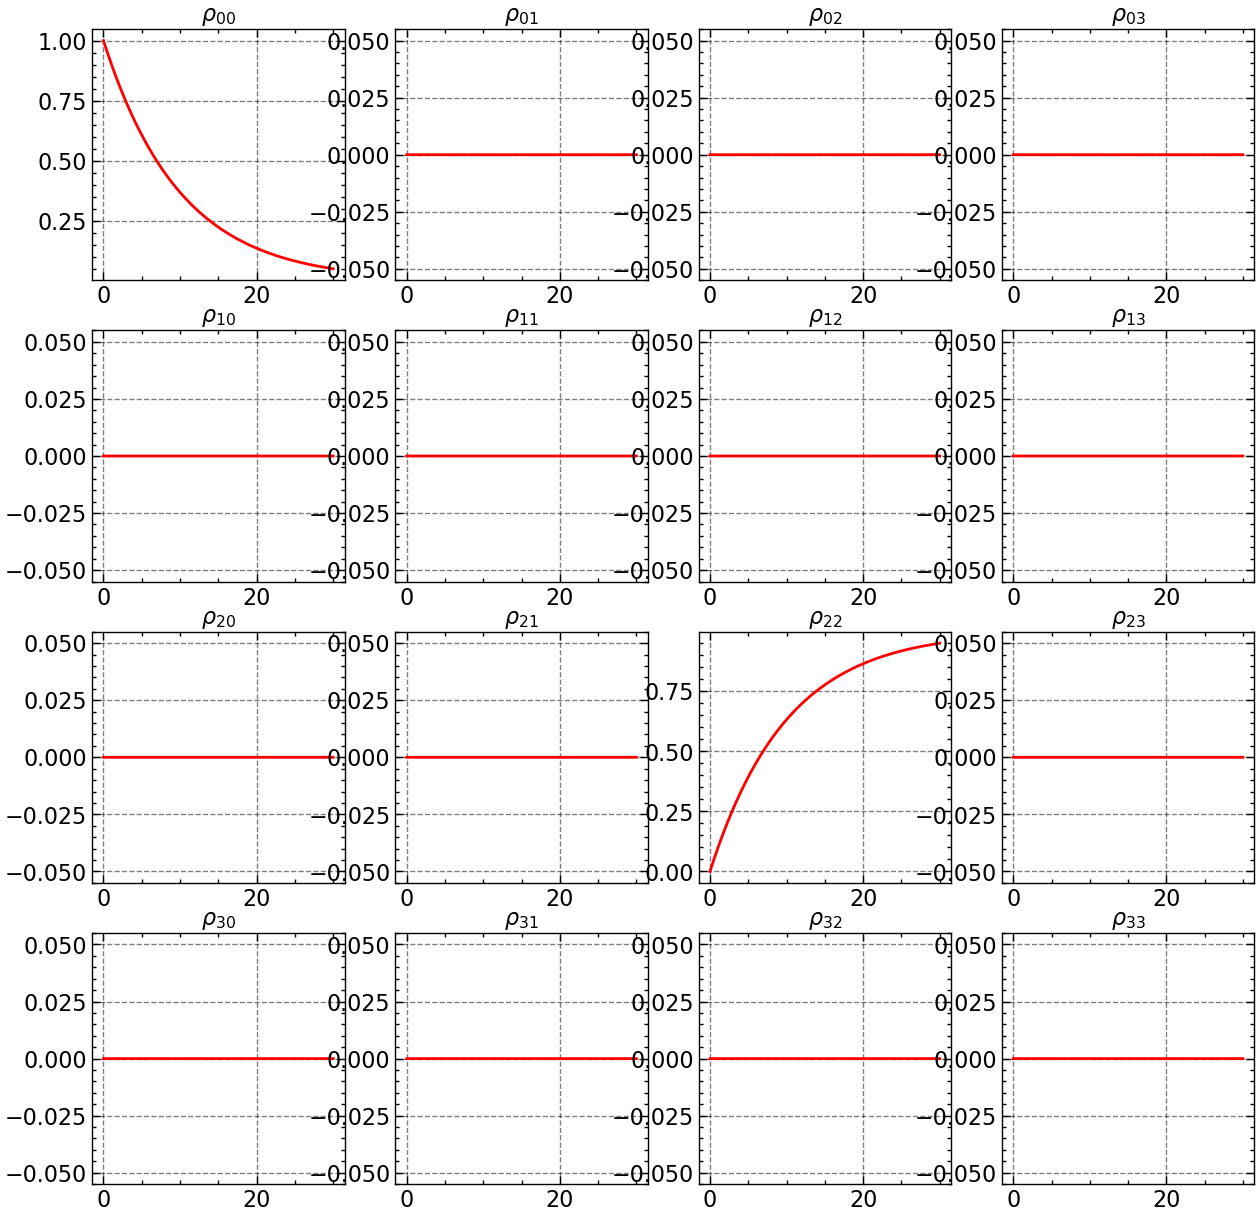

In [14]:
time_axis = np.arange(time_limits_2q_sz1[0], time_limits_2q_sz1[1]+h_2q_sz1, h_2q_sz1)

fig, ax = plt.subplots(4, 4, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        y_data = np.array([state[i, j] for state in states_2q_sz1])
        ax[i, j].plot(time_axis, y_data, label=f'$\\rho_{{{i}{j}}}$', color='red')
        ax[i, j].set_title(f'$\\rho_{{{i}{j}}}$')
